# Teacher Evaluation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

In [2]:
df=pd.read_csv('teacherEval.csv')

In [3]:
df.duplicated().sum()

0

In [4]:
df

,Unnamed: 0,TeacherID,Content,Interaction,Communication,TimeManagement,OverallAverage,OverallEvaluation
0,0,1,3,1,4,1,2.25,Bad
1,1,2,4,4,3,1,3.00,Bad
2,2,3,2,3,2,3,2.50,Bad
3,3,4,4,5,2,2,3.25,Bad
4,4,5,3,5,4,4,4.00,Good
...,...,...,...,...,...,...,...,...
495,495,496,1,5,3,4,3.25,Bad
496,496,497,4,3,2,5,3.50,Bad
497,497,498,2,1,4,5,3.00,Bad
498,498,499,3,2,4,4,3.25,Bad


In [5]:
df['OverallEvaluation']=df['OverallEvaluation'].map({'Bad':0,'Good':1,'Very Good':2})

In [6]:
df=df.drop(columns=['Unnamed: 0','TeacherID','OverallAverage'])
df

,Content,Interaction,Communication,TimeManagement,OverallEvaluation
0,3,1,4,1,0
1,4,4,3,1,0
2,2,3,2,3,0
3,4,5,2,2,0
4,3,5,4,4,1
...,...,...,...,...,...
495,1,5,3,4,0
496,4,3,2,5,0
497,2,1,4,5,0
498,3,2,4,4,0


In [7]:
X=df.iloc[:,0:4]
y=df.iloc[:,4:]

In [8]:
X.corr()

,Content,Interaction,Communication,TimeManagement
Content,1.000000,-0.029161,0.047031,-0.027363
Interaction,-0.029161,1.000000,-0.056038,-0.081457
Communication,0.047031,-0.056038,1.000000,-0.084838
TimeManagement,-0.027363,-0.081457,-0.084838,1.000000


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [10]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)


c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [11]:
y_pred=rf.predict(X_test)

In [12]:
accuracy=accuracy_score(y_test,y_pred)


In [13]:
print('Accuracy',accuracy)

Accuracy 0.944


In [14]:
rf.predict([[5,5,5,5]])

c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [15]:
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}

rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)

rand_search.fit(X_train, y_train)

c:\Program Files\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Program Files\Python311\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kw

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018E114C1210>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000018E114C04D0>})

In [16]:
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 317}


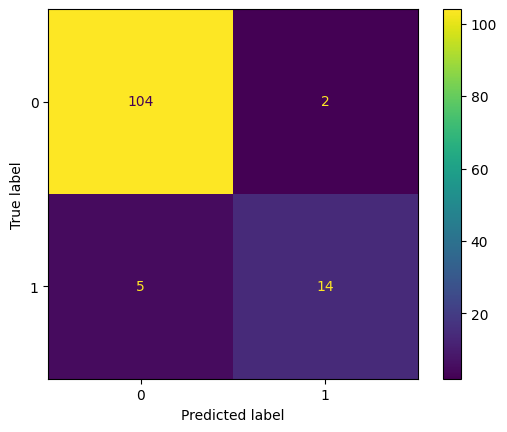

In [17]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [18]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.944


In [ ]:
from joblib import dump
dump(model,'SavedModel/TeacherEval.joblib')